# Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
from matplotlib import gridspec

# Set up the plotting settings

In [2]:
cmap = sns.color_palette("colorblind")
markers = ['o', 'v', 'p', '^', 'h', '<', 's', '>']

# Load the GPR with heteroscedastic noise

In [3]:
# GPR with heteroscedastic noise

path='https://raw.githubusercontent.com/usnistgov/TaML/main/results/'

# main data
ie = np.loadtxt(path+'hetero_direct.csv',
                dtype=float, delimiter=',').transpose()
ve = np.loadtxt(path+'hetero_latentvariable.csv',
                dtype=float, delimiter=',').transpose()
de = np.loadtxt(path+'hetero_difference.csv',
                dtype=float, delimiter=',').transpose()
qe = np.loadtxt(path+'hetero_quotient.csv',
                dtype=float, delimiter=',').transpose()
le = np.loadtxt(path+'hetero_linearprior.csv',
                dtype=float, delimiter=',').transpose()
fe = np.loadtxt(path+'hetero_fixedprior.csv',
                dtype=float, delimiter=',').transpose()
me = np.loadtxt(path+'hetero_parameterization.csv',
                dtype=float, delimiter=',').transpose()

# outlier data
ioe = np.loadtxt(path+'hetero_out_direct.csv',
                 dtype=float, delimiter=',').transpose()
voe = np.loadtxt(path+'hetero_out_latentvariable.csv',
                 dtype=float, delimiter=',').transpose()
doe = np.loadtxt(path+'hetero_out_difference.csv',
                 dtype=float, delimiter=',').transpose()
qoe = np.loadtxt(path+'hetero_out_quotient.csv',
                 dtype=float, delimiter=',').transpose()
loe = np.loadtxt(path+'hetero_out_linearprior.csv',
                 dtype=float, delimiter=',').transpose()
foe = np.loadtxt(path+'hetero_out_fixedprior.csv',
                 dtype=float, delimiter=',').transpose()
moe = np.loadtxt(path+'hetero_out_parameterization.csv',
                 dtype=float, delimiter=',').transpose()

# theory
t = np.loadtxt(path+'theory.csv', 
               dtype=float, delimiter=',').transpose()
to = np.loadtxt(path+'out_theory.csv',
                dtype=float, delimiter=',').transpose()

# Plot the data for GPR with heteroscedastic noise
This is Fig. 1 in Audus, Debra J., Austin McDannald, and Brian DeCost. "Leveraging Theory for Enhanced Machine Learning." *ACS Macro Letters* 11.9 (2022): 1117-1122. DOI: [10.1021/acsmacrolett.2c00369](https://doi.org/10.1021/acsmacrolett.2c00369).

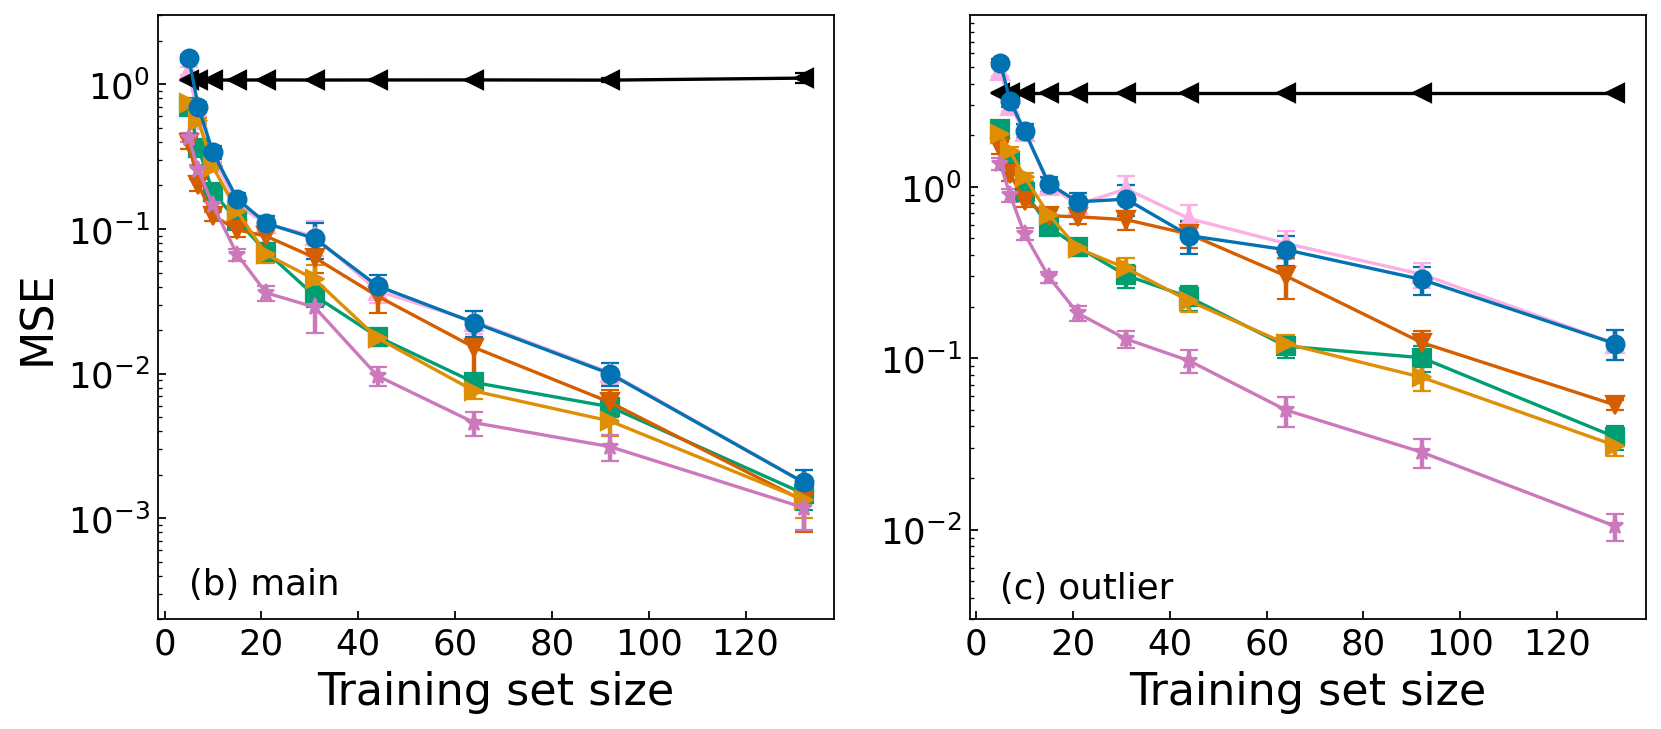

In [4]:
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 5), dpi=160, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2)

specs = {'linestyle': '-', 'elinewidth': 2, 'capsize': 4, 'markersize': 8}

# main data
ax0 = plt.subplot(gs[0])

ax0.errorbar(ve[0], ve[1], yerr=ve[2], color=cmap[6],
             label='latent variable', marker='^', **specs)
ax0.errorbar(de[0], de[1], yerr=de[2], color=cmap[2],
             label='difference', marker='s', **specs)
ax0.errorbar(qe[0], qe[1], yerr=qe[2], color=cmap[3],
             label='quotient', marker='v', **specs)
ax0.errorbar(t[0], t[1], yerr=t[2], color='black',
             label='theory', marker='<', **specs)
ax0.errorbar(le[0], le[1], yerr=le[2], color=cmap[1],
             label='prior', marker='>', **specs)
ax0.errorbar(me[0], me[1], yerr=me[2], color=cmap[4],
             label='param', marker='*', **specs)
ax0.errorbar(ie[0], ie[1], yerr=ie[2], color=cmap[0],
             label='direct', marker='o', **specs)

ax0.set_yscale('log')

# outlier data
ax1 = plt.subplot(gs[1])

ax1.errorbar(voe[0], voe[1], yerr=voe[2], color=cmap[6],
             label='latent variable', marker='^', **specs)
ax1.errorbar(doe[0], doe[1], yerr=doe[2], color=cmap[2],
             label='difference', marker='s', **specs)
ax1.errorbar(qoe[0], qoe[1], yerr=qoe[2], color=cmap[3],
             label='quotient', marker='v', **specs)
ax1.errorbar(to[0], to[1], yerr=to[2], color='black',
             label='theory', marker='<', **specs)
ax1.errorbar(loe[0], loe[1], yerr=loe[2], color=cmap[1],
             label='prior', marker='>', **specs)
ax1.errorbar(moe[0], moe[1], yerr=moe[2], color=cmap[4],
             label='param', marker='*', **specs)
ax1.errorbar(ioe[0], ioe[1], yerr=ioe[2], color=cmap[0],
             label='direct', marker='o', **specs)

ax1.set_yscale('log')

# adjustments

ax0.tick_params(which='minor', axis="y", direction="in")
ax0.tick_params(which='major', axis="y", direction="in")
ax0.tick_params(axis="x", direction="in")

ax1.tick_params(which='minor', axis="y", direction="in")
ax1.tick_params(which='major', axis="y", direction="in")
ax1.tick_params(axis="x", direction="in")

# Labels
ax0.set_xlabel('Training set size', fontsize=20)
ax1.set_xlabel('Training set size', fontsize=20)
ax0.set_ylabel('MSE', fontsize=20)

# Make all y axes the same size
ax0.set_ylim([2e-4, 3])
ax1.set_ylim([3e-3, 10])

# Fix x and y ticks
ax0.set_xticks([0, 20, 40, 60, 80, 100, 120])
ax1.set_xticks([0, 20, 40, 60, 80, 100, 120])
ax0.set_xticklabels([0, 20, 40, 60, 80, 100, 120], fontsize=16)
ax1.set_xticklabels([0, 20, 40, 60, 80, 100, 120], fontsize=16)

ax0.set_yticks([.001,.01,.1,1])
ax0.set_yticklabels([r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$'], fontsize=16)
ax1.set_yticks([.01,.1,1])
ax1.set_yticklabels([r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$'], fontsize=16)

# Add labels to each sub plot
ax0.text(5, .0003, '(b) main', fontsize=16)
ax1.text(5, .004, '(c) outlier', fontsize=16)

plt.savefig('hetero.pdf', bbox_inches='tight')
plt.show()

# Need help on formating? See here: https://matplotlib.org/stable/api/axes_api.html

# Load the data for GPR with homoscedastic noise

In [5]:
# main data
io = np.loadtxt(path+'homo_direct.csv',
                dtype=float, delimiter=',').transpose()
vo = np.loadtxt(path+'homo_latentvariable.csv',
                dtype=float, delimiter=',').transpose()
do = np.loadtxt(path+'homo_difference.csv',
                dtype=float, delimiter=',').transpose()
qo = np.loadtxt(path+'homo_quotient.csv',
                dtype=float, delimiter=',').transpose()
lo = np.loadtxt(path+'homo_linearprior.csv',
                dtype=float, delimiter=',').transpose()
fo = np.loadtxt(path+'homo_fixedprior.csv',
                dtype=float, delimiter=',').transpose()
mo = np.loadtxt(path+'homo_parameterization.csv',
                dtype=float, delimiter=',').transpose()

# outlier data
ioo = np.loadtxt(path+'homo_out_direct.csv',
                 dtype=float, delimiter=',').transpose()
voo = np.loadtxt(path+'homo_out_latentvariable.csv',
                 dtype=float, delimiter=',').transpose()
doo = np.loadtxt(path+'homo_out_difference.csv',
                 dtype=float, delimiter=',').transpose()
qoo = np.loadtxt(path+'homo_out_quotient.csv',
                 dtype=float, delimiter=',').transpose()
loo = np.loadtxt(path+'homo_out_linearprior.csv',
                 dtype=float, delimiter=',').transpose()
foo = np.loadtxt(path+'homo_out_fixedprior.csv',
                 dtype=float, delimiter=',').transpose()
moo = np.loadtxt(path+'homo_out_parameterization.csv',
                 dtype=float, delimiter=',').transpose()

# Load the data for Random Forest

In [6]:
# main data
ir = np.loadtxt(path+'rf_direct_1000_None.csv',
                dtype=float, delimiter=',').transpose()
vr = np.loadtxt(path+'rf_latentvariable_1000_None.csv',
                dtype=float, delimiter=',').transpose()
dr = np.loadtxt(path+'rf_difference_1000_None.csv',
                dtype=float, delimiter=',').transpose()
qr = np.loadtxt(path+'rf_quotient_1000_None.csv',
                dtype=float, delimiter=',').transpose()

# outlier data
ior = np.loadtxt(path+'rf_out_direct_1000_None.csv',
                 dtype=float, delimiter=',').transpose()
vor = np.loadtxt(path+'rf_out_latentvariable_1000_None.csv',
                 dtype=float, delimiter=',').transpose()
dor = np.loadtxt(path+'rf_out_difference_1000_None.csv',
                 dtype=float, delimiter=',').transpose()
qor = np.loadtxt(path+'rf_out_quotient_1000_None.csv',
                 dtype=float, delimiter=',').transpose()

# Plot all data together
This is Fig. S2 in Audus, Debra J., Austin McDannald, and Brian DeCost. "Leveraging Theory for Enhanced Machine Learning." *ACS Macro Letters* 11.9 (2022): 1117-1122. DOI: [10.1021/acsmacrolett.2c00369](https://doi.org/10.1021/acsmacrolett.2c00369).

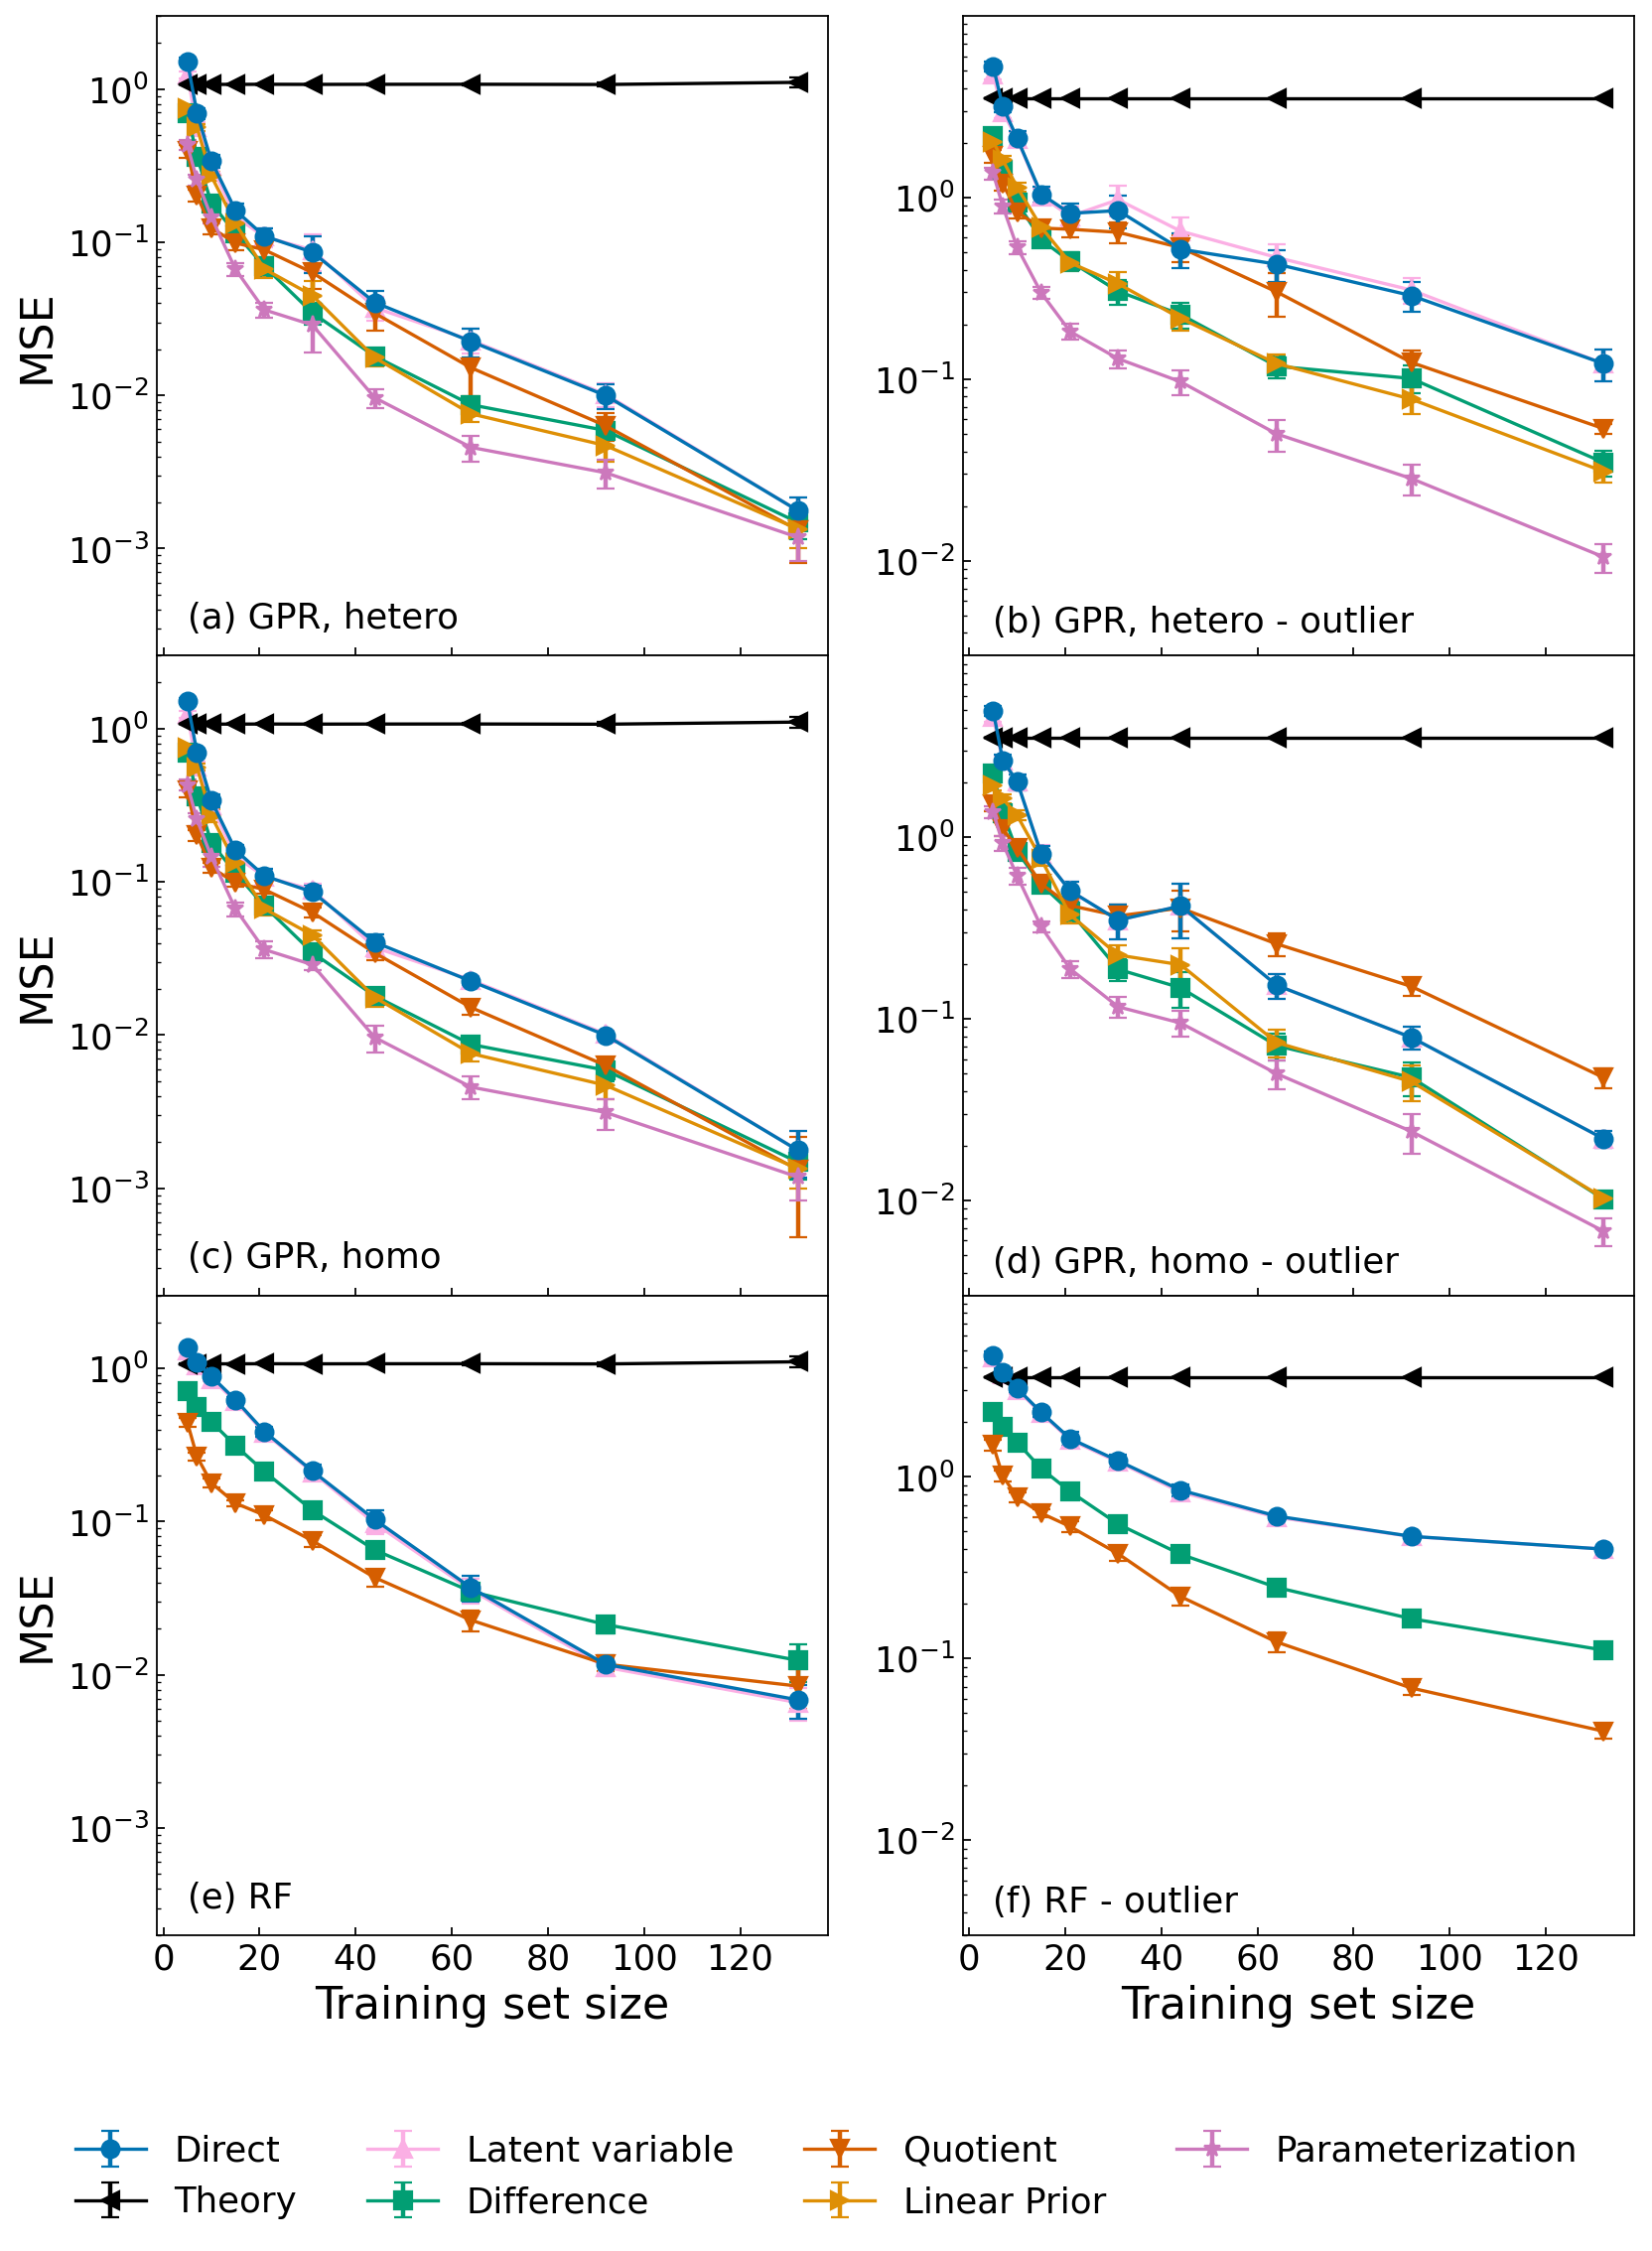

In [7]:
fig = plt.figure(figsize=(12, 16), dpi=160, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(3, 2)

####### GPR with heteroscedastic noise #######

# main data
ax0 = plt.subplot(gs[0])

ax0.errorbar(ve[0], ve[1], yerr=ve[2], color=cmap[6],
             marker='^', **specs)  # label='latent variable'
ax0.errorbar(de[0], de[1], yerr=de[2], color=cmap[2],
             marker='s', **specs)  # label='difference'
ax0.errorbar(qe[0], qe[1], yerr=qe[2], color=cmap[3],
             marker='v', **specs)  # label='quotient'
ax0.errorbar(t[0], t[1], yerr=t[2], color='black',
             marker='<', **specs)  # label='theory'
ax0.errorbar(le[0], le[1], yerr=le[2], color=cmap[1],
             marker='>', **specs)  # label='prior'
ax0.errorbar(me[0], me[1], yerr=me[2], color=cmap[4],
             marker='*', **specs)  # label='param'
ax0.errorbar(ie[0], ie[1], yerr=ie[2], color=cmap[0],
             label='Direct', marker='o', **specs)

ax0.set_yscale('log')

# outlier data
ax1 = plt.subplot(gs[1])

ax1.errorbar(voe[0], voe[1], yerr=voe[2], color=cmap[6],
             marker='^', **specs)  # label='latent variable'
ax1.errorbar(doe[0], doe[1], yerr=doe[2], color=cmap[2],
             marker='s', **specs)  # label='difference'
ax1.errorbar(qoe[0], qoe[1], yerr=qoe[2], color=cmap[3],
             marker='v', **specs)  # label='quotient',
ax1.errorbar(to[0], to[1], yerr=to[2], color='black',
             label='Theory', marker='<', **specs)
ax1.errorbar(loe[0], loe[1], yerr=loe[2], color=cmap[1],
             marker='>', **specs)  # label='prior'
ax1.errorbar(moe[0], moe[1], yerr=moe[2], color=cmap[4],
             marker='*', **specs)  # label='param'
ax1.errorbar(ioe[0], ioe[1], yerr=ioe[2], color=cmap[0],
             marker='o', **specs)  # label='direct'

ax1.set_yscale('log')


####### GPR with homoscedastic noise #######

# main data
ax2 = plt.subplot(gs[2])

ax2.errorbar(vo[0], ve[1], yerr=vo[2], color=cmap[6],
             label='Latent variable', marker='^', **specs)
ax2.errorbar(do[0], de[1], yerr=do[2], color=cmap[2],
             label='Difference', marker='s', **specs)
ax2.errorbar(qo[0], qe[1], yerr=qo[2], color=cmap[3],
             label='Quotient', marker='v', **specs)
ax2.errorbar(t[0], t[1], yerr=t[2], color='black',
             marker='<', **specs)  # label='theory'
ax2.errorbar(lo[0], le[1], yerr=lo[2], color=cmap[1],
             label='Linear Prior', marker='>', **specs)
ax2.errorbar(mo[0], me[1], yerr=mo[2], color=cmap[4],
             label='Parameterization', marker='*', **specs)
ax2.errorbar(io[0], ie[1], yerr=io[2], color=cmap[0],
             marker='o', **specs)  # label='direct'

ax2.set_yscale('log')

# outlier data
ax3 = plt.subplot(gs[3])

ax3.errorbar(voo[0], voo[1], yerr=voo[2], color=cmap[6],
             marker='^', **specs)  # label='latent variable'
ax3.errorbar(doo[0], doo[1], yerr=doo[2], color=cmap[2],
             marker='s', **specs)  # label='difference'
ax3.errorbar(qoo[0], qoo[1], yerr=qoo[2], color=cmap[3],
             marker='v', **specs)  # label='quotient'
ax3.errorbar(to[0], to[1], yerr=to[2], color='black',
             marker='<', **specs)  # label='theory'
ax3.errorbar(loo[0], loo[1], yerr=loo[2], color=cmap[1],
             marker='>', **specs)  # label='prior'
ax3.errorbar(moo[0], moo[1], yerr=moo[2], color=cmap[4],
             marker='*', **specs)  # label='param'
ax3.errorbar(ioo[0], ioo[1], yerr=ioo[2], color=cmap[0],
             marker='o', **specs)  # label='direct'

ax3.set_yscale('log')

# random forest ####### (MISSING AUGMENTED DATA)

# main data
ax4 = plt.subplot(gs[4])

ax4.errorbar(vr[0], vr[1], yerr=vr[2], color=cmap[6],
             marker='^', **specs)  # label='latent variable'
ax4.errorbar(dr[0], dr[1], yerr=dr[2], color=cmap[2],
             marker='s', **specs)  # label='difference'
ax4.errorbar(qr[0], qr[1], yerr=qr[2], color=cmap[3],
             marker='v', **specs)  # label='quotient'
ax4.errorbar(t[0], t[1], yerr=t[2], color='black',
             marker='<', **specs)  # label='theory'
ax4.errorbar(ir[0], ir[1], yerr=ir[2], color=cmap[0],
             marker='o', **specs)  # label='direct'

ax4.set_yscale('log')

# outlier data
ax5 = plt.subplot(gs[5])

ax5.errorbar(vor[0], vor[1], yerr=vor[2], color=cmap[6],
             marker='^', **specs)  # label='latent variable'
ax5.errorbar(dor[0], dor[1], yerr=dor[2], color=cmap[2],
             marker='s', **specs)  # label='difference'
ax5.errorbar(qor[0], qor[1], yerr=qor[2], color=cmap[3],
             marker='v', **specs)  # label='quotient'
ax5.errorbar(to[0], to[1], yerr=to[2], color='black',
             marker='<', **specs)  # label='theory'
ax5.errorbar(ior[0], ior[1], yerr=ior[2], color=cmap[0],
             marker='o', **specs)  # label='direct'

ax5.set_yscale('log')

# plot parameters

plt.subplots_adjust(hspace=.0)

ax0.tick_params(which='minor', axis="y", direction="in")
ax0.tick_params(which='major', axis="y", direction="in")
ax0.tick_params(axis="x", direction="in")

ax1.tick_params(which='minor', axis="y", direction="in")
ax1.tick_params(which='major', axis="y", direction="in")
ax1.tick_params(axis="x", direction="in")

ax2.tick_params(which='minor', axis="y", direction="in")
ax2.tick_params(which='major', axis="y", direction="in")
ax2.tick_params(axis="x", direction="in")

ax3.tick_params(which='minor', axis="y", direction="in")
ax3.tick_params(which='major', axis="y", direction="in")
ax3.tick_params(axis="x", direction="in")

ax4.tick_params(which='minor', axis="y", direction="in")
ax4.tick_params(which='major', axis="y", direction="in")
ax4.tick_params(axis="x", direction="in")

ax5.tick_params(which='minor', axis="y", direction="in")
ax5.tick_params(which='major', axis="y", direction="in")
ax5.tick_params(axis="x", direction="in")

# Labels
ax4.set_xlabel('Training set size', fontsize=20)
ax5.set_xlabel('Training set size', fontsize=20)
ax0.set_ylabel('MSE', fontsize=20)
ax2.set_ylabel('MSE', fontsize=20)
ax4.set_ylabel('MSE', fontsize=20)

# Make all y axes the same size
ax0.set_ylim([2e-4, 3])
ax2.set_ylim([2e-4, 3])
ax4.set_ylim([2e-4, 3])

ax1.set_ylim([3e-3, 10])
ax3.set_ylim([3e-3, 10])
ax5.set_ylim([3e-3, 10])

# Increase tick mark label size for xr
ax4.set_xticks([0, 20, 40, 60, 80, 100, 120])
ax5.set_xticks([0, 20, 40, 60, 80, 100, 120])
ax4.set_xticklabels([0, 20, 40, 60, 80, 100, 120], fontsize=16)
ax5.set_xticklabels([0, 20, 40, 60, 80, 100, 120], fontsize=16)

# Increase tick mark label size for y
ax0.set_yticks([.001,.01,.1,1])
ax0.set_yticklabels([r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$'], fontsize=16)
ax1.set_yticks([.01,.1,1])
ax1.set_yticklabels([r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$'], fontsize=16)
ax2.set_yticks([.001,.01,.1,1])
ax2.set_yticklabels([r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$'], fontsize=16)
ax3.set_yticks([.01,.1,1])
ax3.set_yticklabels([r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$'], fontsize=16)
ax4.set_yticks([.001,.01,.1,1])
ax4.set_yticklabels([r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$'], fontsize=16)
ax5.set_yticks([.01,.1,1])
ax5.set_yticklabels([r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$'], fontsize=16)

# Add labels to each sub plot
ax0.text(5, .0003, '(a) GPR, hetero', fontsize=16)
ax2.text(5, .0003, '(c) GPR, homo', fontsize=16)
ax4.text(5, .0003, '(e) RF', fontsize=16)
ax1.text(5, .004, '(b) GPR, hetero - outlier', fontsize=16)
ax3.text(5, .004, '(d) GPR, homo - outlier', fontsize=16)
ax5.text(5, .004, '(f) RF - outlier', fontsize=16)

fig.legend(loc=8, ncol=4, fontsize=16, frameon=False)

plt.savefig('comp.pdf', bbox_inches='tight')
plt.show()